# **Ecommerce Customer Churn Analysis and Prediction**

# **Definisi Masalah dan Pemahaman Data**

---

## **Definisi Masalah**

**Stakeholder**:  
Stakeholder utama adalah tim manajemen dan divisi retensi pelanggan dari perusahaan e-commerce terkemuka. Para stakeholder bertujuan untuk mengurangi tingkat churn pelanggan dan meningkatkan loyalitas pelanggan melalui strategi promosi yang terarah.

**Pernyataan Masalah**:  
Churn pelanggan dapat menyebabkan kerugian pendapatan yang signifikan serta peningkatan biaya untuk mendapatkan pelanggan baru. Tujuannya adalah mengidentifikasi pelanggan yang berisiko churn menggunakan model prediksi berbasis data. Dengan cara ini, perusahaan dapat mengalokasikan sumber daya secara efisien dan memberikan penawaran promosi yang dipersonalisasi untuk mempertahankan pelanggan yang berisiko tinggi.

- **Spesifik**: Mengidentifikasi pelanggan dengan kemungkinan tinggi untuk churn.
- **Terukur**: Memprediksi churn dengan tingkat precision dan recall yang tinggi, memaksimalkan F1-Score.
- **Dapat Dicapai**: Menggunakan data historis pelanggan, termasuk pola perilaku dan transaksi, untuk melatih model prediksi.

**Pentingnya Masalah**:  
Mencegah churn lebih hemat biaya dibandingkan dengan mendapatkan pelanggan baru. Prediksi churn yang dilakukan lebih awal memungkinkan perusahaan untuk secara proaktif berinteraksi dengan pelanggan yang berisiko, meningkatkan kepuasan pelanggan, dan profitabilitas jangka panjang.

**Target**:  
Mengembangkan model untuk mengklasifikasikan pelanggan menjadi dua kelompok:
- **0**: Pelanggan tidak berisiko churn.
- **1**: Pelanggan berisiko churn.

**Tujuan**:
1. Memprediksi kemungkinan churn untuk setiap pelanggan.
2. Mengidentifikasi faktor utama yang menyebabkan churn pelanggan untuk memberikan wawasan yang dapat ditindaklanjuti.

---

## **Pemahaman Data**

### **Ikhtisar Data**  
Dataset ini berisi informasi tingkat pelanggan, termasuk demografi, riwayat transaksi, metrik perilaku, dan indikator kepuasan. Setiap baris merepresentasikan satu pelanggan, sedangkan setiap kolom menangkap fitur spesifik dari profil mereka.

### **Variabel Utama**:
- **CustomerID**: Identitas unik untuk setiap pelanggan.
- **Churn**: Indikator biner (1 untuk yang churn, 0 untuk tidak churn).
- **Tenure**: Durasi waktu pelanggan telah bersama perusahaan.
- **PreferredLoginDevice**: Jenis perangkat yang digunakan untuk login ke platform.
- **CityTier**: Kategori kota tempat tinggal pelanggan.
- **WarehouseToHome**: Jarak dari gudang ke rumah pelanggan.
- **PreferredPaymentMode**: Metode pembayaran yang disukai pelanggan.
- **Gender**: Jenis kelamin pelanggan.
- **HourSpendOnApp**: Rata-rata waktu yang dihabiskan di aplikasi e-commerce per hari.
- **NumberOfDeviceRegistered**: Jumlah perangkat yang terdaftar di akun pelanggan.
- **PreferedOrderCat**: Kategori produk yang sering dibeli.
- **SatisfactionScore**: Skor kepuasan pelanggan pada skala tertentu.
- **MaritalStatus**: Status pernikahan pelanggan.
- **NumberOfAddress**: Jumlah alamat yang terkait dengan akun.
- **Complain**: Apakah pelanggan pernah mengajukan keluhan.
- **OrderAmountHikeFromlastYear**: Peningkatan nilai pesanan dari tahun sebelumnya.
- **CouponUsed**: Jumlah kupon yang digunakan oleh pelanggan.
- **OrderCount**: Jumlah total pesanan yang dilakukan pelanggan.
- **DaySinceLastOrder**: Hari sejak pesanan terakhir pelanggan.
- **CashbackAmount**: Cashback yang diterima pelanggan.

### **Sumber**:
Dataset ini disediakan oleh perusahaan e-commerce.

### **Observasi Penting**:
1. Dataset mencakup informasi perilaku dan demografis, yang penting untuk memahami churn.
2. Beberapa fitur memiliki nilai yang hilang (contoh: **Tenure**, **HourSpendOnApp**) yang memerlukan imputasi.
3. Data ini cocok untuk teknik pembelajaran terawasi (supervised learning), mengingat adanya variabel target yang jelas (**Churn**).

---

## **Evaluasi Metrik**

### **Jenis Kesalahan dan Dampaknya**

1. **Type 1 Error (False Positive)**:  
   - **Penjelasan**: Model memprediksi bahwa seorang pelanggan akan churn (risiko tinggi), padahal sebenarnya pelanggan tersebut tidak akan churn.  
   - **Dampak**:
     - Pemborosan sumber daya: Anggaran dan upaya digunakan untuk pelanggan yang sebenarnya tidak membutuhkan perhatian.
     - Efek jangka panjang: Bisa menciptakan ketergantungan pelanggan terhadap insentif atau memengaruhi persepsi pelanggan tentang layanan.

2. **Type 2 Error (False Negative)**:  
   - **Penjelasan**: Model memprediksi bahwa seorang pelanggan tidak akan churn (risiko rendah), padahal sebenarnya pelanggan tersebut churn.  
   - **Dampak**:
     - Kehilangan pendapatan: Pelanggan yang churn berarti hilangnya potensi pendapatan jangka panjang.
     - Biaya akuisisi baru: Mengganti pelanggan yang hilang memerlukan biaya lebih tinggi dibandingkan mempertahankan pelanggan lama.

3. **True Positive (TP)**:  
   - **Penjelasan**: Model memprediksi dengan benar bahwa pelanggan akan churn.  
   - **Dampak**:
     - Retensi pelanggan: Perusahaan berhasil mempertahankan pelanggan yang benar-benar rentan churn.
     - Efisiensi biaya: Sumber daya digunakan secara optimal pada pelanggan yang memang berisiko tinggi.

4. **True Negative (TN)**:  
   - **Penjelasan**: Model memprediksi dengan benar bahwa pelanggan tidak akan churn.  
   - **Dampak**:
     - Penghematan biaya: Tidak ada insentif atau program retensi yang diberikan untuk pelanggan yang tidak memerlukannya.
     - Efisiensi fokus: Perusahaan dapat mengalokasikan sumber daya untuk pelanggan yang lebih membutuhkan perhatian.

### **F1-Score**  
**Keunggulan F1-Score**:
- **Keseimbangan Precision dan Recall**: Sebagai harmonic mean dari precision dan recall, F1-Score cocok untuk memastikan model tidak hanya fokus pada meminimalkan false positives (precision) atau false negatives (recall).
- **Efektif untuk Data Tidak Seimbang**: Dalam kasus churn, data sering kali tidak seimbang (lebih banyak pelanggan tidak churn dibanding churn). F1-Score memberikan gambaran yang lebih realistis dibandingkan akurasi.
- **Relevan untuk Tujuan Bisnis**: Memastikan pelanggan yang benar-benar berisiko churn terdeteksi dengan baik tanpa terlalu banyak kesalahan positif.

**Kelemahan F1-Score**:
- **Tidak Mengutamakan Konsekuensi Bisnis**: Memberikan bobot yang sama untuk precision dan recall. Jika salah satu lebih kritis untuk bisnis (misalnya, lebih baik salah mengidentifikasi pelanggan churn daripada kehilangan pelanggan), F1 mungkin kurang optimal.
aik salah mengidentifikasi pelanggan churn daripada kehilangan pelanggan), F1 mungkin kurang optimal.


Data Source : https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction


**Data Dictionary**

Dataset yang digunakan adalah data ecommerce customer churn sebanyak 5630 baris data dan sebanyak 20 kolom atau fitur. Kolom ini mewakili informasi dari pelanggan yang terdaftar. Kolom-kolom yang terdapat dalam dataset antara lain: 

| Variable |Data Type| 	Description| 
|----------|-------|---------
| CustomerID |Integer	|Unique customer ID
|Churn |Integer	|Churn Flag
|Tenure|Float	|Tenure of customer in organization
|PreferredLoginDevice|Object	|Preferred login device of customer
|CityTier|Integer	|City tier
|WarehouseToHome|Float	|Distance in between warehouse to home of customer
|PreferredPaymentMode|	Object|Preferred payment method of customer
|Gender|Object	|Gender of customer
|HourSpendOnApp|Float	|Number of hours spend on mobile application or website
|NumberOfDeviceRegistered|Integer|Total number of deceives is registered on particular customer
|PreferedOrderCat|Object	|Preferred order category of customer in last month
|SatisfactionScore|Integer	|Satisfactory score of customer on service
|MaritalStatus|Object	|Marital status of customer
|NumberOfAddress|Integer	|Total number of added added on particular customer
|Complain|	Integer|Any complaint has been raised in last month
|OrderAmountHikeFromlastYear|Float	|Percentage increases in order from last year
|CouponUsed|Float	|Total number of coupon has been used in last month
|OrderCount	| Float|Total number of orders has been places in last month
|DaySinceLastOrder|Float	|Day Since last order by customer
|CashbackAmount|Float	|Average cashback in last month





In [14]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import scipy.stats as stats
from scipy.stats import chi2_contingency
from sklearn.impute import KNNImputer, SimpleImputer

In [15]:
df = pd.read_excel('E Commerce Dataset.xlsx', sheet_name='E Comm')
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [16]:
df.shape

(5630, 20)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

### **Exploratory Data Analysis**

**Data Distribution**

In [18]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


Untuk melihat distribusi data dari kolom numerik, dapat digunakan boxplot. Untuk mempermudah analisis, kolom dibagi menjadi kolom numerikal dan kolom kategorikal. Walaupun Churn, CityTier, dan Complain bertipe data integer, ketiga kolom ini akan ini akan masuk ke dalam klasifikasi kategorikal karena kolom tersebut mewakili kategori atau flagging.  

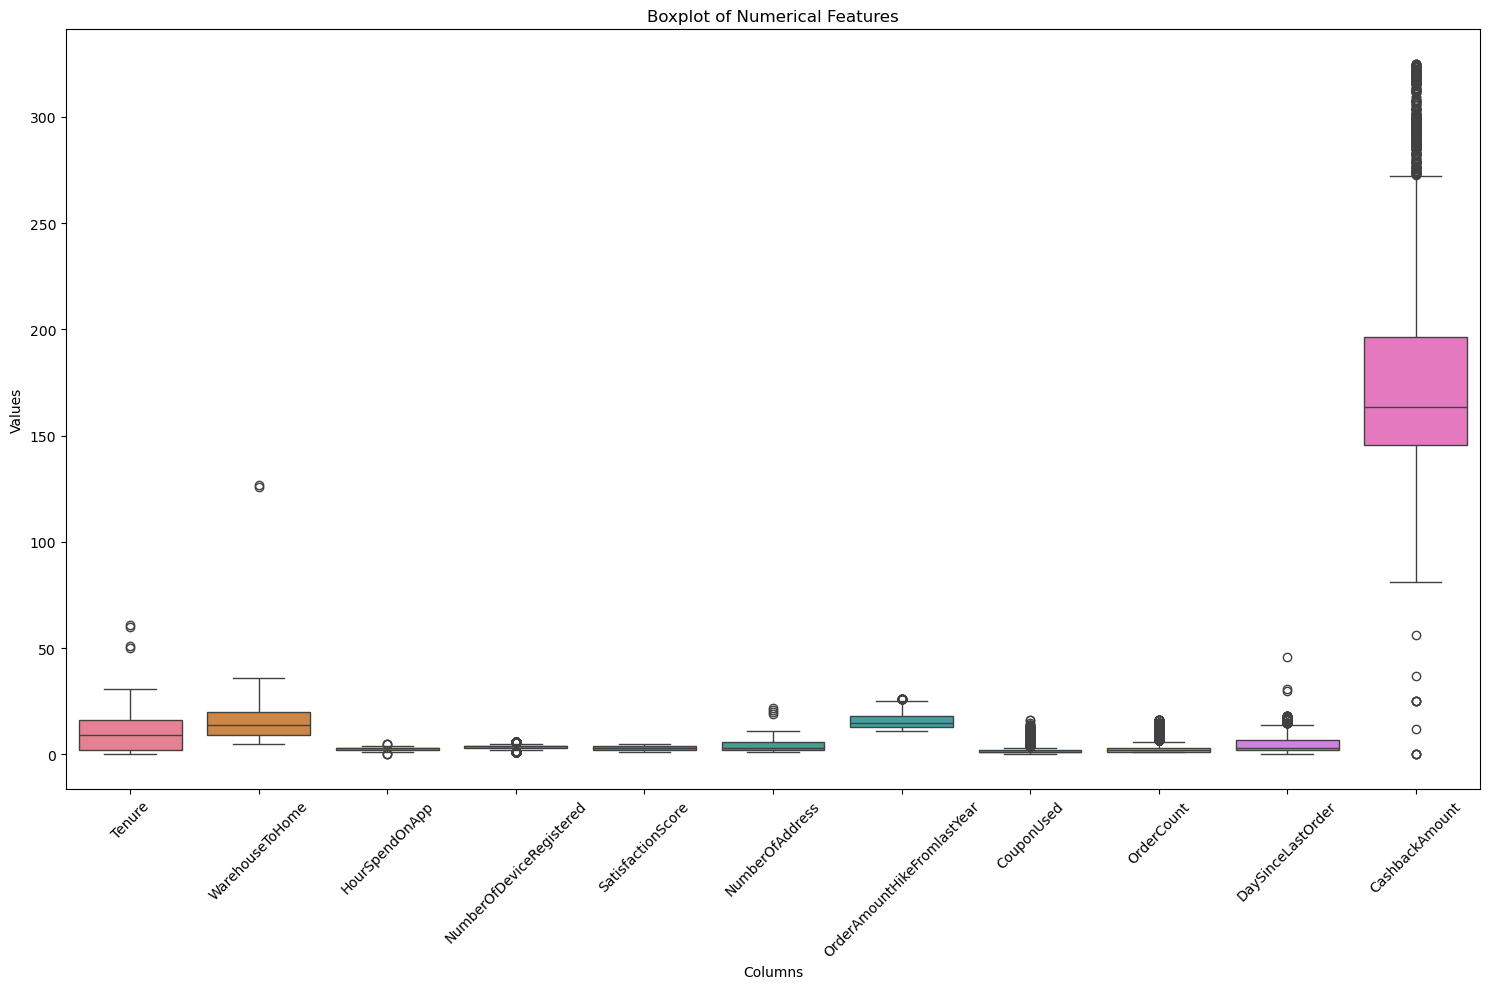

In [19]:
num_columns = [
    'Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore',
    'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed', 
    'OrderCount', 'DaySinceLastOrder', 'CashbackAmount'
]

plt.figure(figsize=(15, 10))  
sns.boxplot(data=df[num_columns])
plt.title('Boxplot of Numerical Features')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=45) 

plt.tight_layout()
plt.show()

Berdasarkan boxplot di atas, dapat dilihat bahwa hampir seluruh kolom numerik, kecuali SatisfactionScore, memiliki nilai outliers. Hal ini dapat dilihat dari adanya titik-titik yang berada di luar whiskers dan ini menunjukkan adanya nilai ekstrem yang perlu dilihat lebih lanjut. 

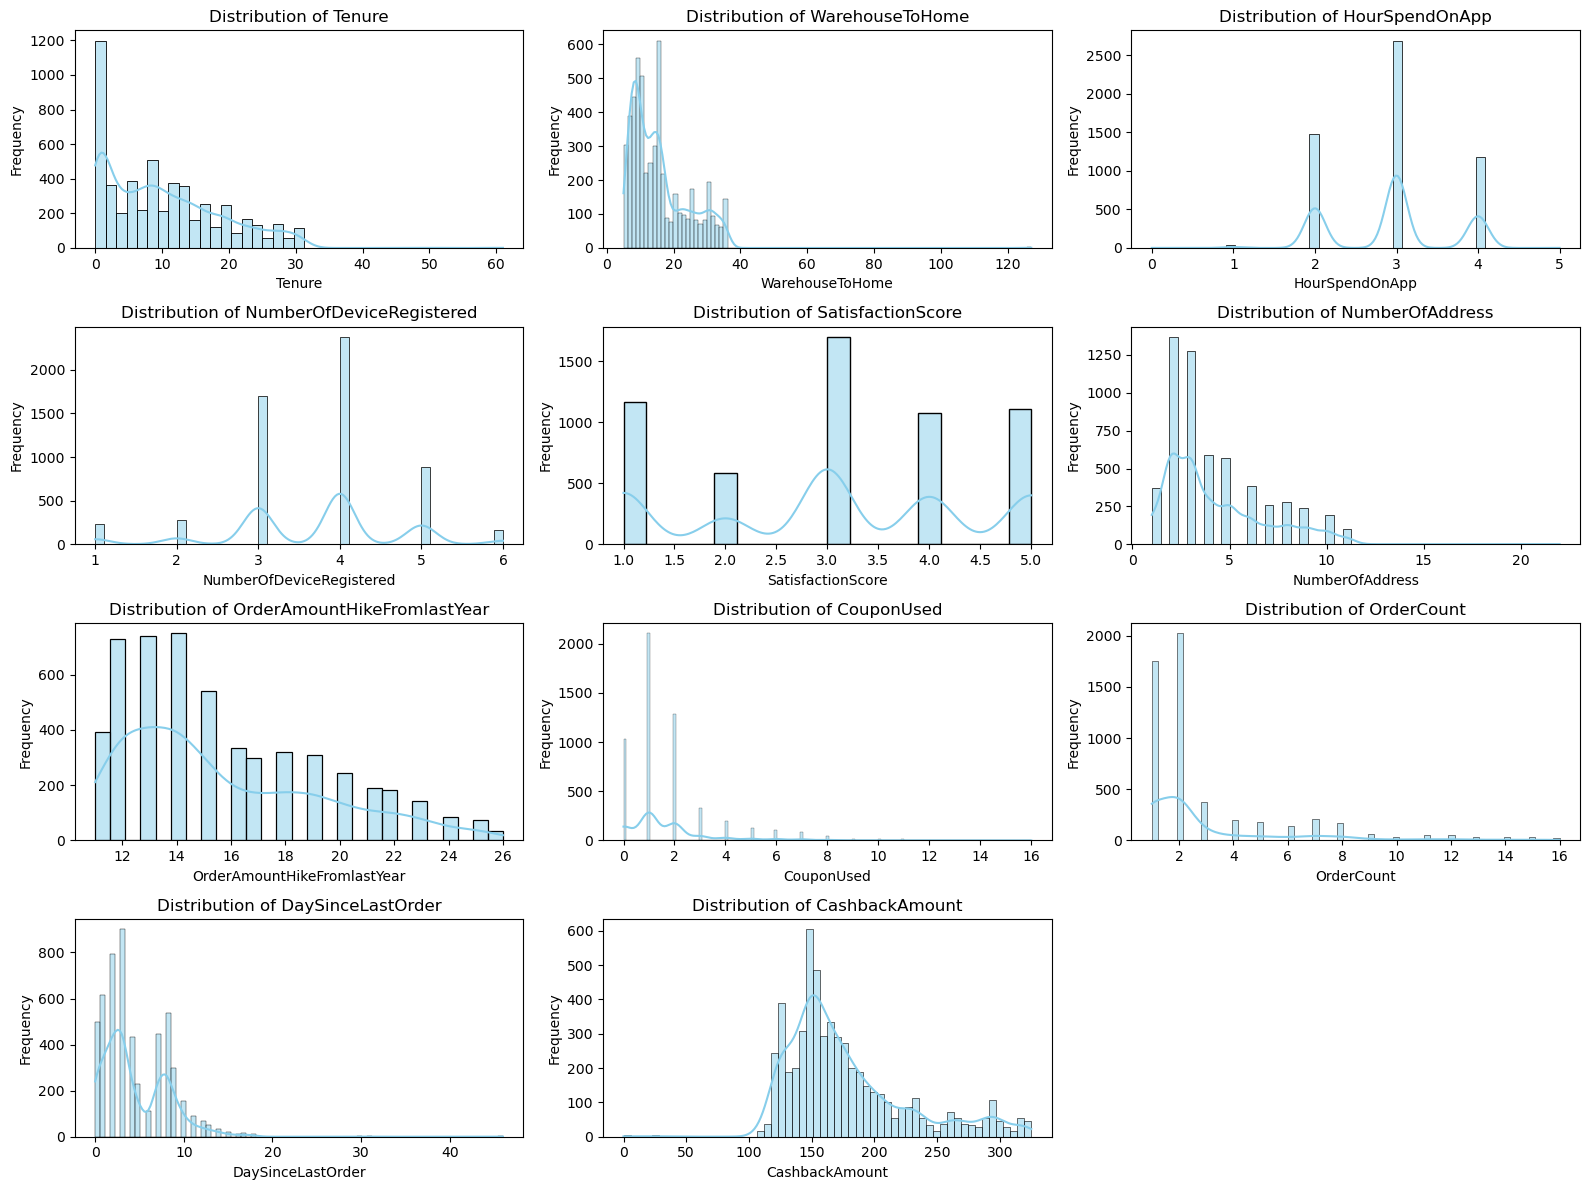

In [20]:
plt.figure(figsize=(16, 12))
for i, feature in enumerate(num_columns, 1):
    plt.subplot(4, 3, i) 
    sns.histplot(df[feature].dropna(), kde=True, color='skyblue') 
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Berdasarkan grafik histogram di atas, secara umum kolom atau fitur pada dataset memiliki distribusi yang tidak simetris dan lebih condong miring ke kanan. Hal ini menunjukkan bahwa banyak pelanggan yang memiliki nilai yang rendah di beberapa kolom atau fitur, seperti pada Tenure, WarehouseToHome, NumberOfAdresses, OrderAmountHikeFromLastYear, CouponUsed, OrderCount, dan DaySinceLastOrder. Salah satu contoh kolom atau fitur yang memiliki distribusi mendekati normal adalah CashbackAmount.

**Data Correlation**

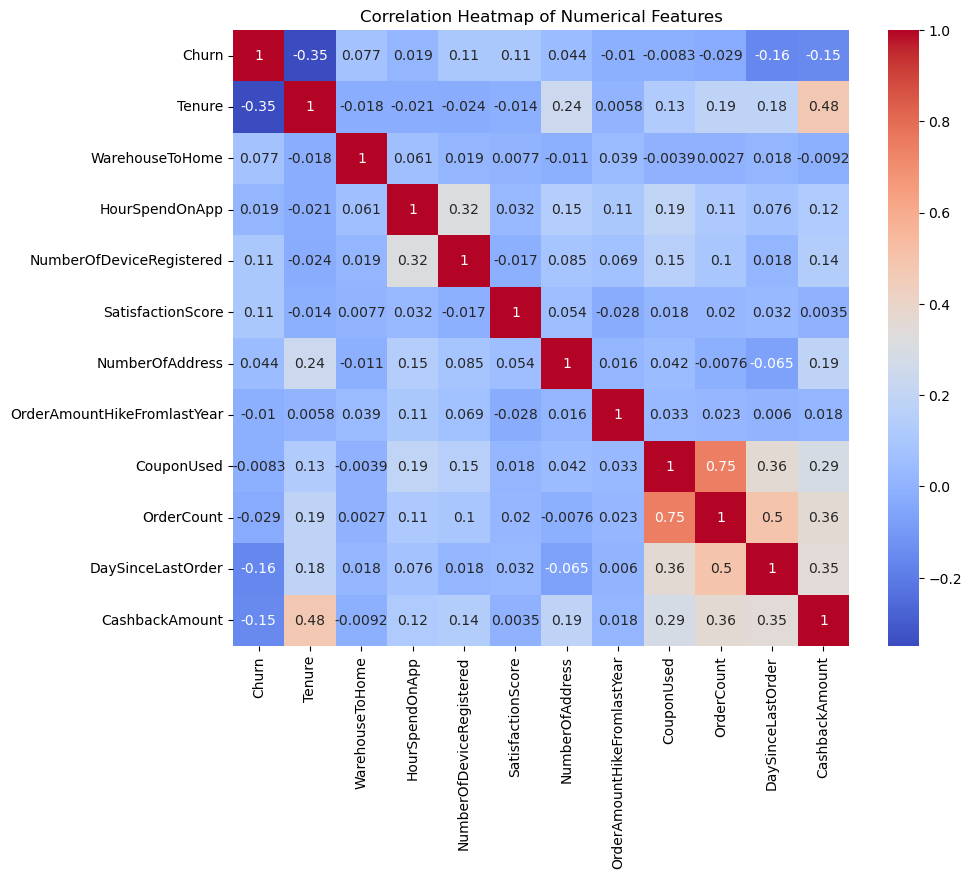

In [21]:
col = [
    'Churn','Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore',
    'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed', 
    'OrderCount', 'DaySinceLastOrder', 'CashbackAmount'
]
correlation_matrix = df[col].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

Berdasarkan heatmap tersebut, terlihat kolom mana saja yang memiliki korelasi relatif kuat dengan kolom Churn, seperti Tenure, Complain, DaySinceLastOrder, dan CashBackAmount. 

In [22]:
cat_columns = ['PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode', 
                        'Gender', 'PreferedOrderCat', 'MaritalStatus', 'Complain']

chi2_results = {}
for feature in cat_columns:
    contingency_table = pd.crosstab(df[feature], df['Churn'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    chi2_results[feature] = p

chi2_results = pd.DataFrame(list(chi2_results.items()), columns=['Feature', 'p-value'])
print("Hasil tes Chi-square untuk kolom kategorikal dengan Churn:")
print(chi2_results)

Hasil tes Chi-square untuk kolom kategorikal dengan Churn:
                Feature       p-value
0  PreferredLoginDevice  1.075692e-16
1              CityTier  1.261200e-09
2  PreferredPaymentMode  9.708709e-15
3                Gender  3.082094e-02
4      PreferedOrderCat  2.770833e-60
5         MaritalStatus  1.073011e-41
6              Complain  2.664461e-78


Berdasarkan hasil uji Chi-square, semua fitur atau kolom yang diuji menunjukkan p-value yang sangat kecil (semua lebih kecil dari 0.05), yang berarti terdapat hubungan yang kuat antara fitur-fitur tersebut dengan Churn. Hal ini menunjukkan bahwa kolom atau fitur tersebut berhubungan dengan kemungkinan pelanggan untuk churn. 

**Data Cardinalities**

In [23]:
listItem = []
for col in df.columns:
    unique_values = df[col].drop_duplicates().values
    sample_size = min(7, len(unique_values))
    unique_sample = list(df[col].drop_duplicates().sample(sample_size).values)
    listItem.append([col, df[col].dtype, df[col].nunique(), unique_sample])

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'unique', 'uniqueSample'],
                      data=listItem)
dfDesc

,dataFeatures,dataType,unique,uniqueSample
0,CustomerID,int64,5630,"[52820, 55490, 50685, 51821, 50816, 51296, 54775]"
1,Churn,int64,2,"[0, 1]"
2,Tenure,float64,36,"[2.0, 18.0, 8.0, 14.0, 12.0, 17.0, 25.0]"
3,PreferredLoginDevice,object,3,"[Mobile Phone, Phone, Computer]"
4,CityTier,int64,3,"[3, 1, 2]"
5,WarehouseToHome,float64,34,"[27.0, 8.0, 35.0, 29.0, 19.0, 33.0, 36.0]"
6,PreferredPaymentMode,object,7,"[UPI, Debit Card, Credit Card, CC, Cash on Del..."
7,Gender,object,2,"[Male, Female]"
8,HourSpendOnApp,float64,6,"[0.0, 3.0, nan, 2.0, 5.0, 4.0, 1.0]"
9,NumberOfDeviceRegistered,int64,6,"[1, 3, 4, 6, 5, 2]"


Berdasarkan pengecekan nilai unik pada dataset, pada beberapa kolom, ditemukan beberapa nilai dengan penamaan yang tidak konsisten. Misalnya pada kolom PrefferedLoginDevice terdapat nilai 'Mobile Phone' dan 'Phone' yang merujuk ke perangkat yang sama. Kemudian pada kolom PreferredPaymentMode terdapat 'CC' dan 'Credit Card' yang merujuk kepada penggunaan kartu kredit, serta 'COD' dan 'Cash on Delivery' yang merujuk pada satu metode pembayaran yang sama. Selain itu, pada kolom PreferedOrderCat terdapat 'Mobile' dan 'Mobile Phone' yang merujuk pada kategori yang sama. 

**Identifying Missing Value**

In [24]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'nullCount', 'nullPercentage'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,nullCount,nullPercentage
0,CustomerID,int64,0,0.00
1,Churn,int64,0,0.00
2,Tenure,float64,264,4.69
3,PreferredLoginDevice,object,0,0.00
4,CityTier,int64,0,0.00
5,WarehouseToHome,float64,251,4.46
6,PreferredPaymentMode,object,0,0.00
7,Gender,object,0,0.00
8,HourSpendOnApp,float64,255,4.53
9,NumberOfDeviceRegistered,int64,0,0.00


Terdapat 7 kolom yang memiliki missing value, Tenure, WerehouseToHome, HourSpendOnApp, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, DaySinceLastOrder. 

<Axes: >

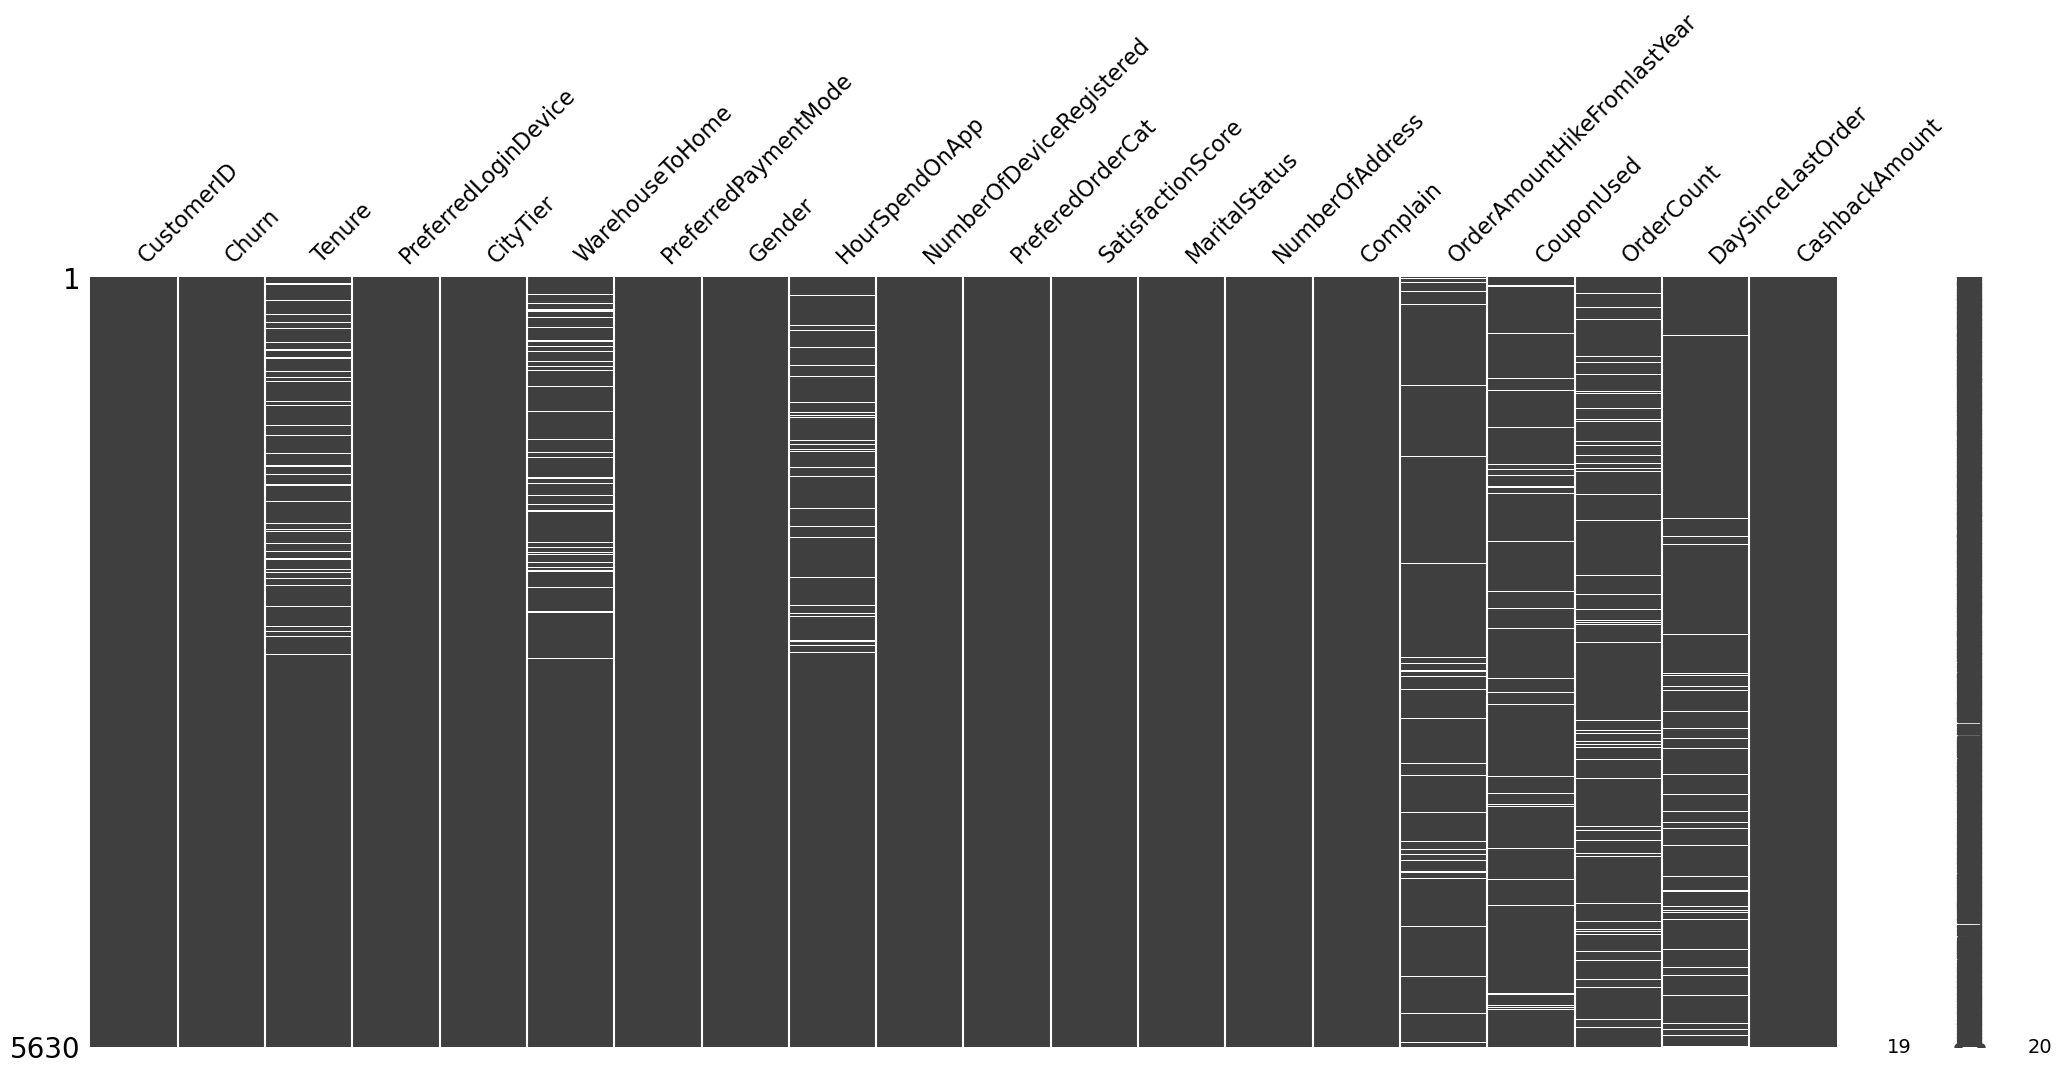

In [25]:
msno.matrix(df)

Missing value pada dateset ini dapat diklasifikasikan menjadi 3, yaitu: 

1. Missing Completely at Random (MCAR)
Data MCAR adalah data yang nilai hilangnya tidak memiliki pola tertentu. Fitur WarehouseToHome dan HourSpendOnApp mungkin termasuk dalam kategori MCAR, karena waktu yang dihabiskan di aplikasi atau jarak ke gudang mungkin tidak bergantung pada fitur lainnya.
- Pendekatan Penanganan: Karena data MCAR tidak bergantung pada fitur lain, nilai yang hilang dapat diisi dengan nilai rata-rata atau median tanpa menimbulkan bias yang berarti.

2. Missing at Random (MAR)
Nilai hilang pada MAR berkaitan dengan data lain yang teramati. Fitur seperti Tenure dan OrderAmountHikeFromlastYear bisa termasuk MAR, karena pelanggan dengan masa penggunaan yang lebih singkat mungkin memiliki lebih banyak data yang hilang, dan kebiasaan belanja (sehingga kenaikan jumlah order) dapat berkorelasi dengan masa penggunaan atau waktu penggunaan aplikasi.
- Pendekatan Penanganan: Untuk data MAR, metode seperti imputasi berdasarkan fitur yang terkait (misalnya, menggunakan pengelompokan berdasarkan masa penggunaan untuk mengisi nilai hilang) atau model prediktif dapat digunakan untuk mengisi nilai hilang berdasarkan pola dalam data yang teramati.

3. Missing Not at Random (MNAR)
MNAR terjadi ketika nilai hilang terkait dengan nilai dari fitur itu sendiri. Fitur CouponUsed, OrderCount, dan DaySinceLastOrder mungkin termasuk MNAR jika, misalnya, pelanggan yang jarang menggunakan kupon atau jarang memesan memiliki nilai hilang pada fitur-fitur ini, atau ada periode tanpa pesanan baru.
- Pendekatan Penanganan: Untuk MNAR, strategi yang efektif meliputi membuat variabel indikator untuk menandai tempat data hilang, karena hilangnya nilai ini bisa saja memiliki informasi penting. Alternatifnya, bisa dipertimbangkan imputasi berdasarkan pengetahuan spesifik domain atau memodelkan missingness langsung jika memungkinkan.

Langkah Selanjutnya
Untuk menangani missing value ini:
- MCAR: Gunakan imputasi median.
- MAR:  KNN Imputer.
- MNAR: Buat variabel indikator dan gunakan pengetahuan spesifik domain atau pertimbangkan strategi imputasi lanjutan seperti iterative imputer.

**Note**: Imputasi data dilakukan terpisah berdasarkan nilai variabel kategori `Churn`. Untuk baris dengan kategori tertentu, nilai yang hilang diimputasi menggunakan median dan KNN dari subset data yang memiliki kategori yang sama. Hal ini memastikan bahwa imputasi dilakukan sesuai dengan distribusi data dalam masing-masing grup kategori tersebut.

**Identifying Duplicates**

In [13]:
df[df.duplicated()].shape[0]

0

Dapat dilihat bahwa tidak terdapat data duplikat yang teridentifikasi. 

**Identifying Outliers**

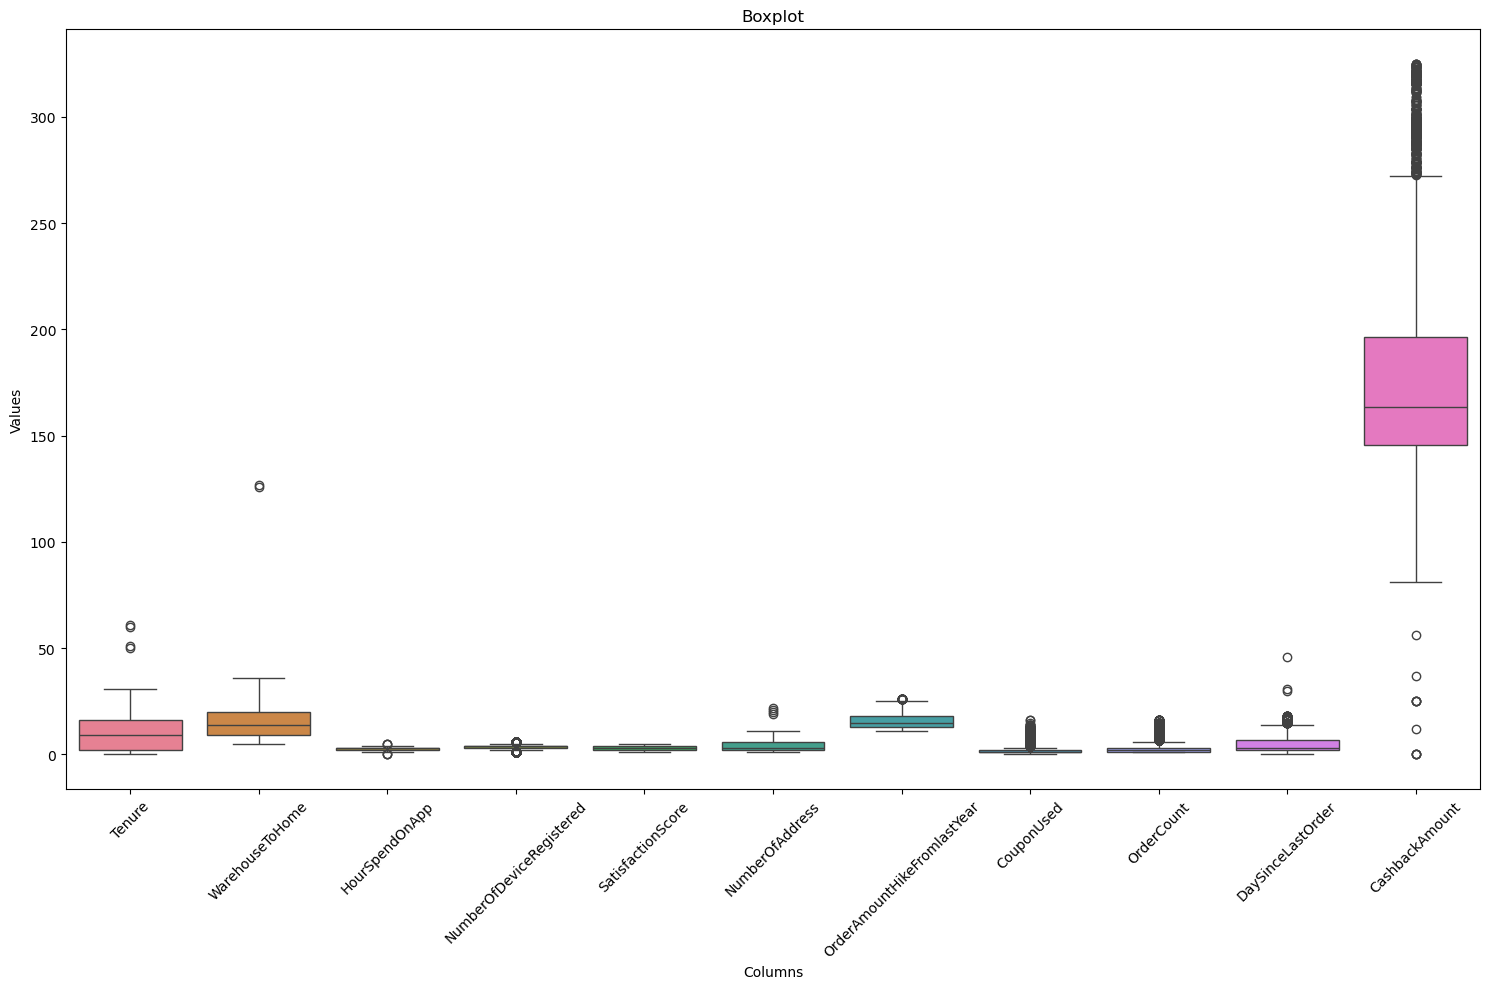

In [14]:
num_columns = [
    'Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore',
    'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed', 
    'OrderCount', 'DaySinceLastOrder', 'CashbackAmount'
]

plt.figure(figsize=(15, 10))  
sns.boxplot(data=df[num_columns])
plt.title('Boxplot')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=45) 

plt.tight_layout()
plt.show()

Outliers pada dataset dapat dilihat melalui boxplot yang telah dilakukan sebelumnya untuk melihat distribusi data. Pada grafik tersebut dapat dilihat bahwa hampir seluruh kolom numerikal, kecuali SatisfactionScore, memiliki nilai outliers. Selanjutnya, dapat dicari berapa banyak outliers dari masing-masing kolom. 

In [15]:
def count_outliers(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    return outliers.shape[0]

outliers_counts = {col: count_outliers(df, col) for col in num_columns}

for col, count in outliers_counts.items():
    print(f"{col}: {count} outliers")

Tenure: 4 outliers
WarehouseToHome: 2 outliers
HourSpendOnApp: 6 outliers
NumberOfDeviceRegistered: 397 outliers
SatisfactionScore: 0 outliers
NumberOfAddress: 4 outliers
OrderAmountHikeFromlastYear: 33 outliers
CouponUsed: 629 outliers
OrderCount: 703 outliers
DaySinceLastOrder: 62 outliers
CashbackAmount: 438 outliers


Berdasarkan hasil pengecekan, data yang termasuk ke dalam outliers dapat dikatakan cukup banyak sehingga penghapusan mungkin akan mempengaruhi hasil analisis. Pendekatan penanganan outliers yang dilakukan adalah mengganti nilai outliers dengan nilai ambang batas yang dihitung berdasarkan upper range dan lower range dari masing-masing kolom. Hal ini dilakukan mengurangi pengaruh nilai ekstrim tersebut terhadap model atau analisis tanpa menghapus data. 

### **Data Preprocessing**

In [16]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,unique,uniqueSample
0,CustomerID,int64,5630,"[55088, 54699]"
1,Churn,int64,2,"[0, 1]"
2,Tenure,float64,36,"[20.0, 22.0]"
3,PreferredLoginDevice,object,3,"[Mobile Phone, Computer]"
4,CityTier,int64,3,"[2, 1]"
5,WarehouseToHome,float64,34,"[31.0, 23.0]"
6,PreferredPaymentMode,object,7,"[E wallet, Credit Card]"
7,Gender,object,2,"[Female, Male]"
8,HourSpendOnApp,float64,6,"[1.0, nan]"
9,NumberOfDeviceRegistered,int64,6,"[3, 4]"


Pada beberapa kolom, ditemukan beberapa nilai yang tidak konsisten. Misalnya pada kolom PrefferedLoginDevice terdapat nilai 'Mobile Phone' dan 'Phone' yang merujuk ke perangkat yang sama. Oleh karenanya, dilakukan replace value untuk menangani hal ini. Selain kolom PrefferedLoginDevice, pada kolom PreferredPaymentMode dan PreferedOrderCat juga ditemukan hal yang sama.

In [17]:
df['PreferredLoginDevice'].replace('Phone', 'Mobile Phone', inplace=True)
df['PreferredPaymentMode'].replace({'CC': 'Credit Card', 'COD': 'Cash on Delivery'}, inplace=True)
df['PreferedOrderCat'].replace('Mobile' , 'Mobile Phone', inplace=True)

***Missing Values***

In [18]:
df.isna().sum()/df.shape[0]*100

CustomerID                     0.000000
Churn                          0.000000
Tenure                         4.689165
PreferredLoginDevice           0.000000
CityTier                       0.000000
WarehouseToHome                4.458259
PreferredPaymentMode           0.000000
Gender                         0.000000
HourSpendOnApp                 4.529307
NumberOfDeviceRegistered       0.000000
PreferedOrderCat               0.000000
SatisfactionScore              0.000000
MaritalStatus                  0.000000
NumberOfAddress                0.000000
Complain                       0.000000
OrderAmountHikeFromlastYear    4.706927
CouponUsed                     4.547069
OrderCount                     4.582593
DaySinceLastOrder              5.452931
CashbackAmount                 0.000000
dtype: float64

Terdapat 7 kolom yang memiliki missing value, Tenure, WerehouseToHome, HourSpendOnApp, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, DaySinceLastOrder

In [19]:
df.isna().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

Ringkasan dari pengecekan nilai null pada dataset dapat dilihat melalui tabel berikut:

In [20]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'nullCount', 'nullPercentage'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,nullCount,nullPercentage
0,CustomerID,int64,0,0.00
1,Churn,int64,0,0.00
2,Tenure,float64,264,4.69
3,PreferredLoginDevice,object,0,0.00
4,CityTier,int64,0,0.00
5,WarehouseToHome,float64,251,4.46
6,PreferredPaymentMode,object,0,0.00
7,Gender,object,0,0.00
8,HourSpendOnApp,float64,255,4.53
9,NumberOfDeviceRegistered,int64,0,0.00


Berdasarkan identifikasi missing value sebelumnya, penanganan missing value untuk kolom Tenure dan OrderAmountHikeFromLastYear akan ditangani dengan menggunakan KNNImputer. Sedangkan pada kolom WareHouseToHome dan HourSpendOnApp akan menggunakan nilai median dari masing-masing kolom. 

In [21]:
knn_imputer = KNNImputer(n_neighbors=5)

df.loc[df['Churn'] == 0, ['Tenure', 'OrderAmountHikeFromlastYear']] = knn_imputer.fit_transform(
    df.loc[df['Churn'] == 0, ['Tenure', 'OrderAmountHikeFromlastYear']]
)

df.loc[df['Churn'] == 1, ['Tenure', 'OrderAmountHikeFromlastYear']] = knn_imputer.fit_transform(
    df.loc[df['Churn'] == 1, ['Tenure', 'OrderAmountHikeFromlastYear']]
)

In [22]:
median_imputer = SimpleImputer(strategy='median')

df.loc[df['Churn'] == 0, ['WarehouseToHome', 'HourSpendOnApp']] = median_imputer.fit_transform(
    df.loc[df['Churn'] == 0, ['WarehouseToHome', 'HourSpendOnApp']]
)

df.loc[df['Churn'] == 1, ['WarehouseToHome', 'HourSpendOnApp']] = median_imputer.fit_transform(
    df.loc[df['Churn'] == 1, ['WarehouseToHome', 'HourSpendOnApp']]
)

Penanganan untuk MNAR 

1. CouponUsed  
   - Nilai yang hilang pada CouponUsed dapat terjadi jika pelanggan jarang atau bahkan tidak pernah menggunakan kupon. Pendekatan yang dapat dilakukan adalah mengisi nilai hilang dengan nilai 0 (untuk menandakan bahwa kupon tidak digunakan), atau membuat variabel indikator yang mencatat nilai hilang sebagai kategori khusus, misalnya “Tidak Digunakan”.
   - Penggunaan kupon umumnya bersifat sporadis atau preferensi tertentu, sehingga asumsi ini logis.

2. OrderCount  
   - Pada OrderCount, nilai hilang dapat diasumsikan sebagai tidak adanya pesanan pada periode tertentu. Pendekatan ini dapat diatasi dengan mengisi nilai hilang dengan angka 0 atau membuat indikator khusus untuk menunjukkan adanya periode non-pesanan.
   - Banyak e-commerce mencatat periode tanpa aktivitas pesanan, sehingga nilai 0 atau variabel indikator dapat memberikan wawasan lebih lanjut.


In [23]:
df['CouponUsed'] = df['CouponUsed'].fillna(0)
df['OrderCount'] = df['OrderCount'].fillna(0)

3. DaySinceLastOrder  
   - Jika missing values di kolom DaySinceLastOrder menggambarkan ketidakaktifan atau ketiadaan pesanan, mengisi nilai hilang dengan perkiraan tertentu bisa menyesatkan. Menambahkan variabel indikator (flag) untuk menunjukkan pelanggan yang memiliki nilai missing di kolom ini dapat memberikan insight tambahan. Ini sangat berguna karena memungkinkan analisis terpisah antara pelanggan yang aktif dan tidak aktif.
   - Tambahkan kolom baru, misalnya NoLastOrderInfo, yang berisi nilai 1 jika DaySinceLastOrder hilang dan 0 jika tidak. Setelah menandai, nilai hilang di DaySinceLastOrder bisa diisi dengan nilai median atau mean.
   - Jika pelanggan tertentu tidak pernah memesan, isi nilai hilangnya dengan median dan berikan indikator 1 pada kolom NoLastOrderInfo. Dengan demikian, kita dapat menyegmentasi pelanggan berdasarkan aktivitas mereka.
   - Dengan pendekatan ini, kita menggunakan konteks operasional dari e-commerce untuk memastikan bahwa pengisian nilai hilang tetap memberikan informasi yang relevan dan tidak mengaburkan pola dalam data.

In [24]:
df['NoLastOrderInfo'] = df['DaySinceLastOrder'].isna().astype(int)

In [25]:
median_imputer = SimpleImputer(strategy='median')

df.loc[df['Churn'] == 0, ['DaySinceLastOrder']] = median_imputer.fit_transform(
    df.loc[df['Churn'] == 0, ['DaySinceLastOrder']]
)

df.loc[df['Churn'] == 1, ['DaySinceLastOrder']] = median_imputer.fit_transform(
    df.loc[df['Churn'] == 1, ['DaySinceLastOrder']]
)

In [26]:
df.isna().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
NoLastOrderInfo                0
dtype: int64

***Outliers***

In [27]:
num_columns = [
    'Tenure','WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore',
    'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed', 
    'OrderCount', 'DaySinceLastOrder', 'CashbackAmount'
]

def count_outliers(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    return outliers.shape[0]

outliers_counts = {col: count_outliers(df, col) for col in num_columns}

for col, count in outliers_counts.items():
    print(f"{col}: {count} outliers")

Tenure: 4 outliers
WarehouseToHome: 2 outliers
HourSpendOnApp: 6 outliers
NumberOfDeviceRegistered: 397 outliers
SatisfactionScore: 0 outliers
NumberOfAddress: 4 outliers
OrderAmountHikeFromlastYear: 33 outliers
CouponUsed: 629 outliers
OrderCount: 703 outliers
DaySinceLastOrder: 62 outliers
CashbackAmount: 438 outliers


Berdasarkan hasil identifikasi sebelumnya, data yang termasuk ke dalam outliers dapat dikatakan cukup banyak sehingga penghapusan memiliki potentsi untuk mempengaruhi hasil analisis. Pendekatan penanganan outliers yang dilakukan adalah mengganti nilai outliers dengan nilai ambang batas yang dihitung berdasarkan upper range dan lower range dari masing-masing kolom. Hal ini dilakukan mengurangi pengaruh nilai ekstrim tersebut terhadap model atau analisis tanpa menghapus data. 

In [28]:
num_columns = [
    'Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore',
    'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed', 
    'OrderCount', 'DaySinceLastOrder', 'CashbackAmount'
]

def replace_outliers_with_bounds(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    data[col] = data[col].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))
    
    return data

for col in num_columns:
    df = replace_outliers_with_bounds(df, col)

In [29]:
outliers_counts = {col: count_outliers(df, col) for col in num_columns}

for col, count in outliers_counts.items():
    print(f"{col}: {count} outliers")

Tenure: 0 outliers
WarehouseToHome: 0 outliers
HourSpendOnApp: 0 outliers
NumberOfDeviceRegistered: 0 outliers
SatisfactionScore: 0 outliers
NumberOfAddress: 0 outliers
OrderAmountHikeFromlastYear: 0 outliers
CouponUsed: 0 outliers
OrderCount: 0 outliers
DaySinceLastOrder: 0 outliers
CashbackAmount: 0 outliers


***Remove Unused Data***

Beriktunya, dapat dilakukan penghapusan kolom yang tidak digunakan untuk analisis, yaitu kolom Customer ID. Kolom CustomerID dapat dihapus karena berisi ID unik pelanggan, dimana ID ini tidak memberikan informasi langsung tentang perilaku atau faktor churn.

In [30]:
df.drop(columns=['CustomerID'], inplace=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5630 non-null   int64  
 1   Tenure                       5630 non-null   float64
 2   PreferredLoginDevice         5630 non-null   object 
 3   CityTier                     5630 non-null   int64  
 4   WarehouseToHome              5630 non-null   float64
 5   PreferredPaymentMode         5630 non-null   object 
 6   Gender                       5630 non-null   object 
 7   HourSpendOnApp               5630 non-null   float64
 8   NumberOfDeviceRegistered     5630 non-null   float64
 9   PreferedOrderCat             5630 non-null   object 
 10  SatisfactionScore            5630 non-null   int64  
 11  MaritalStatus                5630 non-null   object 
 12  NumberOfAddress              5630 non-null   float64
 13  Complain          

### **Data Analysis**

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15220\2077782159.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_counts.index, y=churn_percent.values, palette='coolwarm')


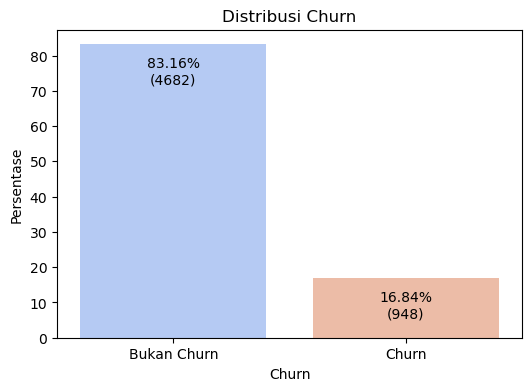

In [32]:
churn_counts = df['Churn'].value_counts()
churn_percent = df['Churn'].value_counts(normalize=True) * 100

plt.figure(figsize=(6, 4))
sns.barplot(x=churn_counts.index, y=churn_percent.values, palette='coolwarm')

for i, (count, percent) in enumerate(zip(churn_counts.values, churn_percent.values)):
    plt.text(i, percent - 12, f'{percent:.2f}%\n({count})', ha='center', va='bottom', color='black')

plt.title('Distribusi Churn')
plt.xlabel('Churn')
plt.ylabel('Persentase')
plt.xticks([0, 1], ['Bukan Churn', 'Churn'])
plt.show()


Berdasarkan grafik tersebut, dapat dilihat bahwa persentase Bukan Churn dan Churn adalah 83.16% atau sebanyak 4682 pelanggan dan 16.84% atau sebanyak 948 pelangan. Dapat dikatakan, perbandingan Bukan Churn dengan Churn adalah sebesar 5 : 1. Selanjutnya, dapat dilakukan pengecekan korelasi antar kolom dengan menggunakan heatmap. 

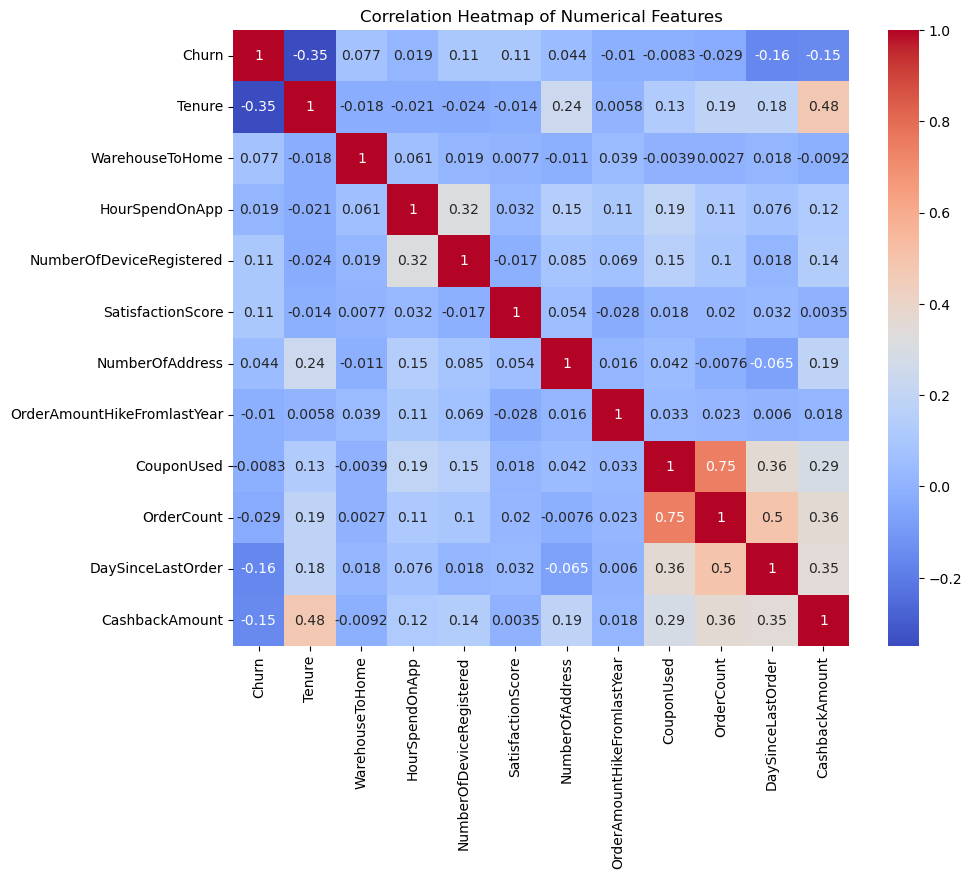

In [33]:
col = [
    'Churn','Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore',
    'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed', 
    'OrderCount', 'DaySinceLastOrder', 'CashbackAmount'
]
correlation = df[col].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

Berdasarkan heatmap tersebut, terlihat kolom mana saja yang memiliki korelasi relatif kuat dengan kolom Churn, seperti Tenure, Complain, DaySinceLastOrder, dan CashBackAmount. Selain itu, terdapat beberapa kolom atau fitur yang relevan secara logis dengan Churn Flag (fitur tujuan), yaitu: 

1. E Comm Tenure (Masa Keanggotaan Pelanggan)
   - Masa keanggotaan mencerminkan durasi pelanggan berinteraksi dengan platform.
   - Pelanggan dengan masa keanggotaan lebih pendek mungkin belum memiliki keterikatan kuat dengan platform, sehingga lebih rentan untuk berhenti. Sebaliknya, pelanggan dengan masa keanggotaan panjang cenderung lebih loyal.

2. E Comm SatisfactionScore (Skor Kepuasan Pelanggan)
   - Kepuasan pelanggan adalah indikator langsung dari pengalaman mereka dengan layanan.
   - Skor kepuasan rendah menunjukkan ketidakpuasan, yang dapat mendorong pelanggan untuk mencari alternatif lain, meningkatkan kemungkinan churn.

3. E Comm Complain (Keluhan Pelanggan)
   - Keluhan mencerminkan masalah yang dialami pelanggan.
   - Pelanggan yang mengajukan keluhan, terutama jika tidak ditangani dengan baik, lebih mungkin merasa tidak puas dan memutuskan untuk berhenti menggunakan layanan.

4. E Comm DaySinceLastOrder (Hari Sejak Pesanan Terakhir)
   - Frekuensi pembelian mencerminkan keterlibatan pelanggan.
   - Semakin lama interval sejak pesanan terakhir, semakin besar kemungkinan pelanggan telah kehilangan minat atau beralih ke platform lain, meningkatkan risiko churn.

5. E Comm OrderCount (Jumlah Pesanan dalam Sebulan Terakhir)
   - Aktivitas pembelian mencerminkan keterlibatan dan nilai pelanggan.
   - Jumlah pesanan yang rendah dalam periode terbaru dapat menunjukkan penurunan minat atau kebutuhan, yang dapat menjadi indikator awal dari churn.

6. E Comm HourSpendOnApp (Jam yang Dihabiskan di Aplikasi)
   - Waktu yang dihabiskan di aplikasi mencerminkan tingkat keterlibatan.
   - Penurunan signifikan dalam waktu yang dihabiskan di aplikasi dapat menunjukkan penurunan minat atau kepuasan, yang dapat menyebabkan churn.

7. E Comm PreferredPaymentMode (Metode Pembayaran Pilihan)
   - Preferensi pembayaran dapat memengaruhi kenyamanan dan kepuasan pelanggan.
   - Jika metode pembayaran pilihan tidak lagi didukung atau mengalami masalah, pelanggan mungkin merasa tidak puas dan mempertimbangkan untuk berhenti.

8. E Comm CashbackAmount (Jumlah Cashback Rata-rata dalam Sebulan Terakhir)
   - Insentif finansial seperti cashback dapat meningkatkan loyalitas pelanggan.
   - Penurunan atau penghentian cashback dapat membuat pelanggan merasa kurang dihargai, meningkatkan risiko churn.

**Churn dengan PreferredLoginDevice**

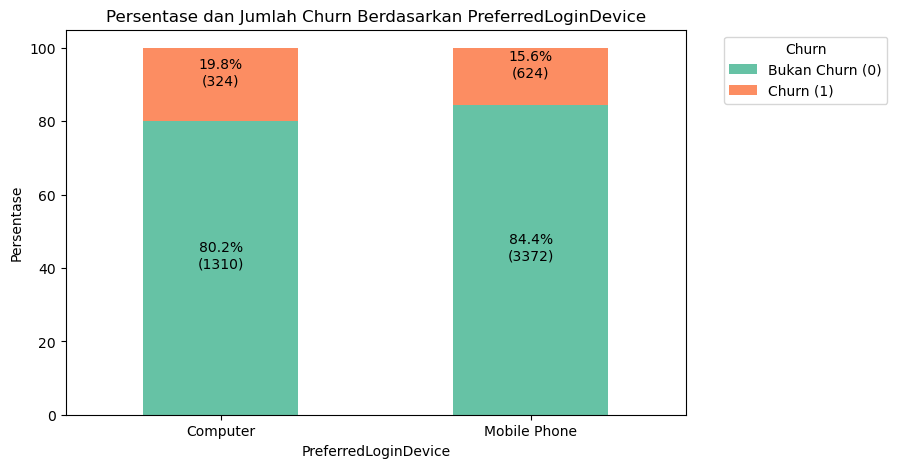

In [34]:
col = 'PreferredLoginDevice'

churn_counts = df.groupby([col, 'Churn']).size().unstack(fill_value=0)
churn_percent = churn_counts.div(churn_counts.sum(axis=1), axis=0) * 100

ax = churn_percent.plot(kind='bar', stacked=True, color=sns.color_palette('Set2'), figsize=(8, 5))

plt.title(f'Persentase dan Jumlah Churn Berdasarkan {col}')
plt.xlabel(col)
plt.ylabel('Persentase')
plt.xticks(rotation=0)
plt.legend(['Bukan Churn (0)', 'Churn (1)'], title='Churn', bbox_to_anchor=(1.05, 1), loc='upper left')

for i, (label, row) in enumerate(churn_percent.iterrows()):
    non_churn_count = churn_counts.loc[label, 0]
    churn_count = churn_counts.loc[label, 1]
    
    plt.text(i, row[0] / 2, f'{row[0]:.1f}%\n({non_churn_count})', ha='center', color='black')
    plt.text(i, row[0] + row[1] / 2, f'{row[1]:.1f}%\n({churn_count})', ha='center', color='black')

plt.show()

Pelanggan yang lebih menyukai untuk melakukan log in melalui komputer memiliki tingkat churn yang lebih tinggi dibandingkan dengan pelanggan yang menggunakan ponsel.

**Churn dengan CityTier**

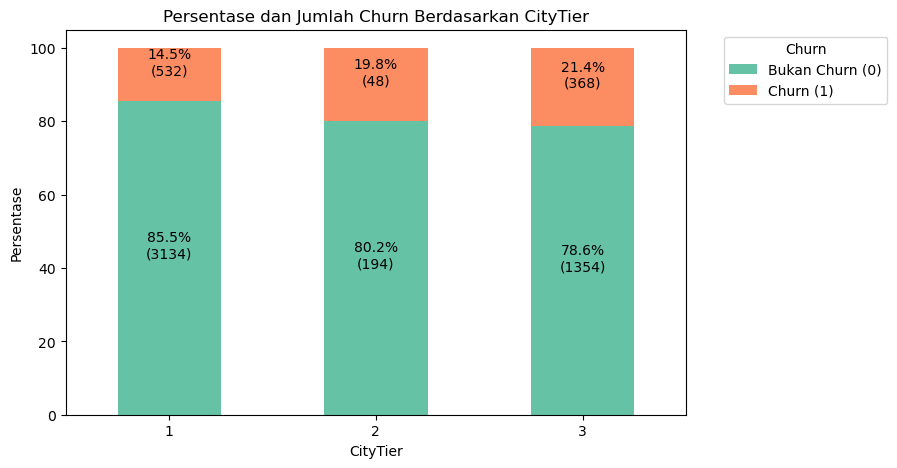

In [35]:
col = 'CityTier'

churn_counts = df.groupby([col, 'Churn']).size().unstack(fill_value=0)
churn_percent = churn_counts.div(churn_counts.sum(axis=1), axis=0) * 100

ax = churn_percent.plot(kind='bar', stacked=True, color=sns.color_palette('Set2'), figsize=(8, 5))

plt.title(f'Persentase dan Jumlah Churn Berdasarkan {col}')
plt.xlabel(col)
plt.ylabel('Persentase')
plt.xticks(rotation=0)
plt.legend(['Bukan Churn (0)', 'Churn (1)'], title='Churn', bbox_to_anchor=(1.05, 1), loc='upper left')

for i, (label, row) in enumerate(churn_percent.iterrows()):
    non_churn_count = churn_counts.loc[label, 0]
    churn_count = churn_counts.loc[label, 1]
    
    plt.text(i, row[0] / 2, f'{row[0]:.1f}%\n({non_churn_count})', ha='center', color='black')
    plt.text(i, row[0] + row[1] / 2, f'{row[1]:.1f}%\n({churn_count})', ha='center', color='black')

plt.show()

Pelanggan yang berada di Tier 3 memiliki persentase tingkat churn tertinggi, mengindikasikan pelanggan pada Tier 3 lebih cenderung untuk menjadi churn dibandingkan pelanggan di Tier 1 dan 2. 

**Churn dengan PreferredPaymentMode**

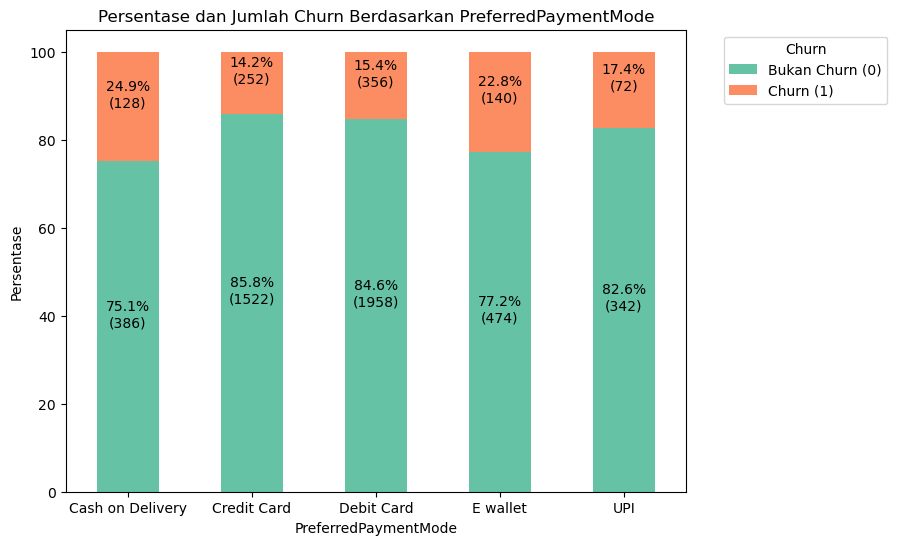

In [36]:
col = 'PreferredPaymentMode'

churn_counts = df.groupby([col, 'Churn']).size().unstack(fill_value=0)
churn_percent = churn_counts.div(churn_counts.sum(axis=1), axis=0) * 100

ax = churn_percent.plot(kind='bar', stacked=True, color=sns.color_palette('Set2'), figsize=(8, 6))

plt.title(f'Persentase dan Jumlah Churn Berdasarkan {col}')
plt.xlabel(col)
plt.ylabel('Persentase')
plt.xticks(rotation=0)
plt.legend(['Bukan Churn (0)', 'Churn (1)'], title='Churn', bbox_to_anchor=(1.05, 1), loc='upper left')

for i, (label, row) in enumerate(churn_percent.iterrows()):
    non_churn_count = churn_counts.loc[label, 0]
    churn_count = churn_counts.loc[label, 1]
    
    plt.text(i, row[0] / 2, f'{row[0]:.1f}%\n({non_churn_count})', ha='center', color='black')
    plt.text(i, row[0] + row[1] / 2, f'{row[1]:.1f}%\n({churn_count})', ha='center', color='black')

plt.show()

Metode COD (Cash On Delivery) memiliki persentase tingkat churn tertinggi diikuti dengan penggunaan E-Wallet. Hal ini dapat mengindikasikan bahwa terdapat masalah pada transaksi atau kurangnya kepuasan pelanggan dalam menggunakan metode pembayaran tersebut. Sementara itu, metode pembayaran dengan menggunakan kartu kredit (Credit Card) memiliki persentase tingkat churn terendah. Hal ini dapat mengindikasikan bahwa pelanggan lebih puas dalam menggunakan proses pembayaran menggunakan kartu kredit. 

**Churn dengan Gender**


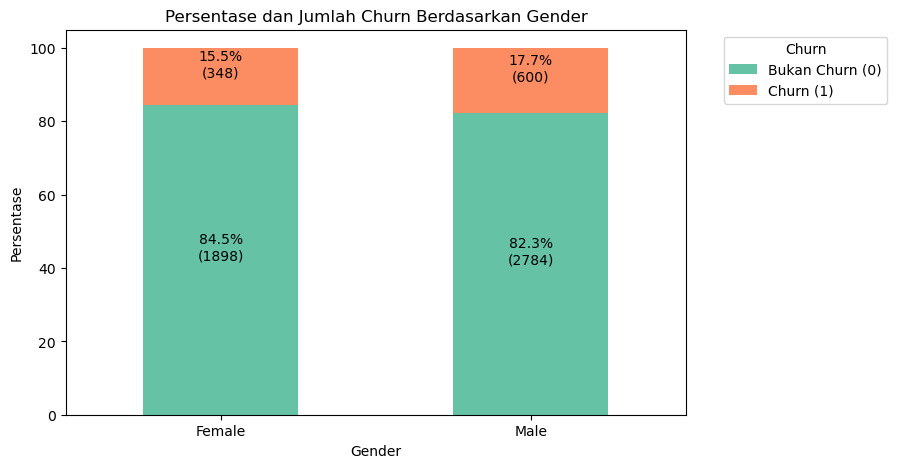

In [37]:
col = 'Gender'

churn_counts = df.groupby([col, 'Churn']).size().unstack(fill_value=0)
churn_percent = churn_counts.div(churn_counts.sum(axis=1), axis=0) * 100

ax = churn_percent.plot(kind='bar', stacked=True, color=sns.color_palette('Set2'), figsize=(8, 5))

plt.title(f'Persentase dan Jumlah Churn Berdasarkan {col}')
plt.xlabel(col)
plt.ylabel('Persentase')
plt.xticks(rotation=0)
plt.legend(['Bukan Churn (0)', 'Churn (1)'], title='Churn', bbox_to_anchor=(1.05, 1), loc='upper left')

for i, (label, row) in enumerate(churn_percent.iterrows()):
    non_churn_count = churn_counts.loc[label, 0]
    churn_count = churn_counts.loc[label, 1]
    
    plt.text(i, row[0] / 2, f'{row[0]:.1f}%\n({non_churn_count})', ha='center', color='black')
    plt.text(i, row[0] + row[1] / 2, f'{row[1]:.1f}%\n({churn_count})', ha='center', color='black')

plt.show()

Pelanggan pria memiliki persentase churn lebih tinggi dibandingkan pelanggan wanita, mengindikasikan pelanggan pria lebih cenderung menjadi churn dibandingkan pelanggan wanita. 

**Churn dengan PreferedOrderCat**

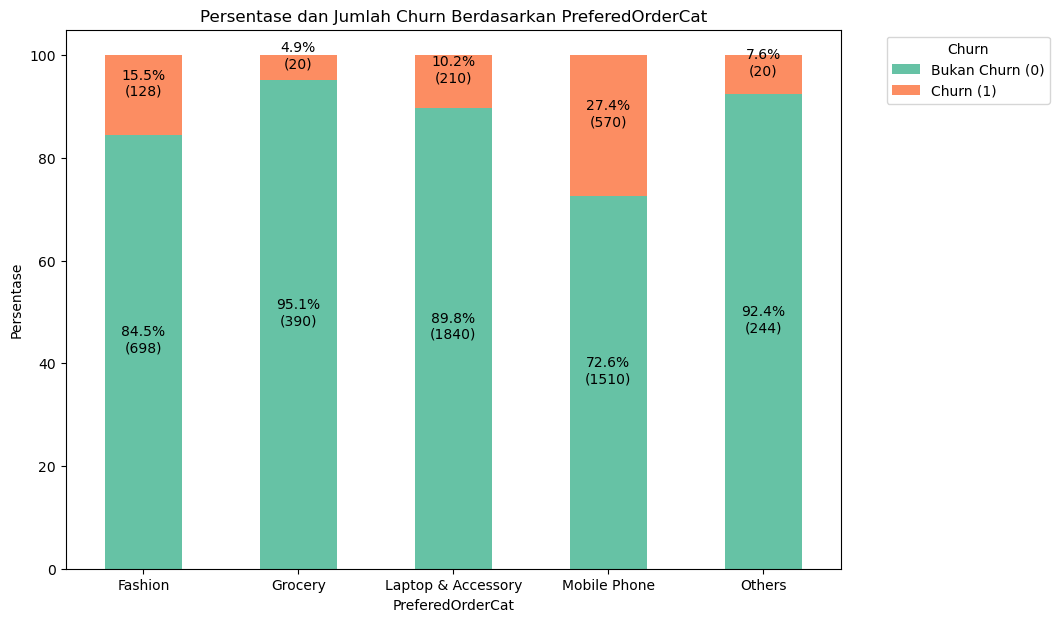

In [38]:
col = 'PreferedOrderCat'

churn_counts = df.groupby([col, 'Churn']).size().unstack(fill_value=0)
churn_percent = churn_counts.div(churn_counts.sum(axis=1), axis=0) * 100

ax = churn_percent.plot(kind='bar', stacked=True, color=sns.color_palette('Set2'), figsize=(10, 7))

plt.title(f'Persentase dan Jumlah Churn Berdasarkan {col}')
plt.xlabel(col)
plt.ylabel('Persentase')
plt.xticks(rotation=0)
plt.legend(['Bukan Churn (0)', 'Churn (1)'], title='Churn', bbox_to_anchor=(1.05, 1), loc='upper left')

for i, (label, row) in enumerate(churn_percent.iterrows()):
    non_churn_count = churn_counts.loc[label, 0]
    churn_count = churn_counts.loc[label, 1]
    
    plt.text(i, row[0] / 2, f'{row[0]:.1f}%\n({non_churn_count})', ha='center', color='black')
    plt.text(i, row[0] + row[1] / 2, f'{row[1]:.1f}%\n({churn_count})', ha='center', color='black')

plt.show()

Pelanggan yang memiliki preferensi untuk membeli kategori mobile phone memiliki persentase tingkat churn tertinggi, hal ini menunjukkan kemungkinan ketidakpuasan pelanggan ketika membeli produk pada kategori tersebut. Sedangkan pelanggan yang memiliki preferensi katergori groceries memiliki tingkat churn yang terendah. 

**Churn dengan MaritalStatus**

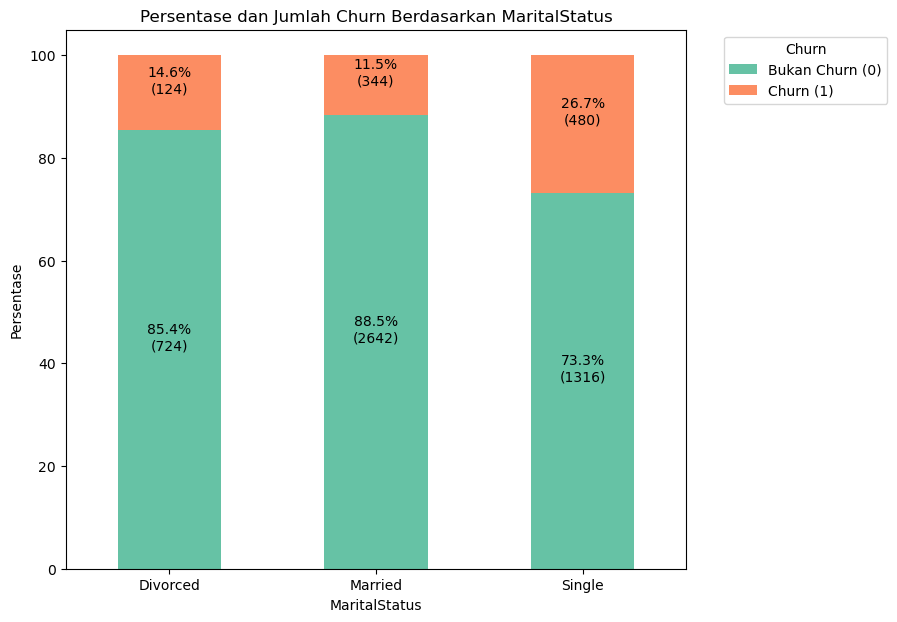

In [39]:
col = 'MaritalStatus'

churn_counts = df.groupby([col, 'Churn']).size().unstack(fill_value=0)
churn_percent = churn_counts.div(churn_counts.sum(axis=1), axis=0) * 100

ax = churn_percent.plot(kind='bar', stacked=True, color=sns.color_palette('Set2'), figsize=(8, 7))

plt.title(f'Persentase dan Jumlah Churn Berdasarkan {col}')
plt.xlabel(col)
plt.ylabel('Persentase')
plt.xticks(rotation=0)
plt.legend(['Bukan Churn (0)', 'Churn (1)'], title='Churn', bbox_to_anchor=(1.05, 1), loc='upper left')

for i, (label, row) in enumerate(churn_percent.iterrows()):
    non_churn_count = churn_counts.loc[label, 0]
    churn_count = churn_counts.loc[label, 1]
    
    plt.text(i, row[0] / 2, f'{row[0]:.1f}%\n({non_churn_count})', ha='center', color='black')
    plt.text(i, row[0] + row[1] / 2, f'{row[1]:.1f}%\n({churn_count})', ha='center', color='black')

plt.show()

Pelanggan dengan status pernikahan single memiliki tingkat churn tertinggi, mengindikasikan pelanggan dengan status single lebih berpotensi untuk menjadi churn dibandingkan dengan pelanggan yang memiliki status married dan divorced. 

**Churn dengan Complain**

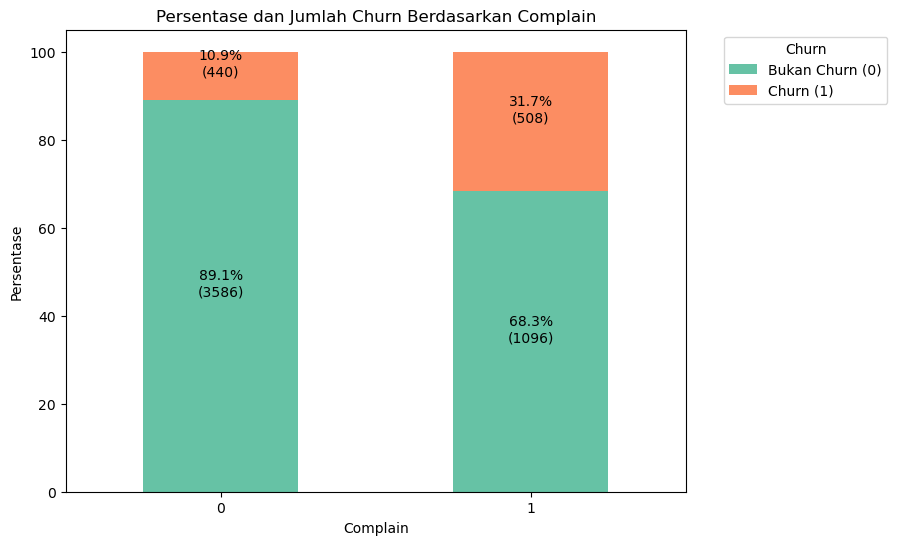

In [40]:
col = 'Complain'

churn_counts = df.groupby([col, 'Churn']).size().unstack(fill_value=0)
churn_percent = churn_counts.div(churn_counts.sum(axis=1), axis=0) * 100

ax = churn_percent.plot(kind='bar', stacked=True, color=sns.color_palette('Set2'), figsize=(8, 6))

plt.title(f'Persentase dan Jumlah Churn Berdasarkan {col}')
plt.xlabel(col)
plt.ylabel('Persentase')
plt.xticks(rotation=0)
plt.legend(['Bukan Churn (0)', 'Churn (1)'], title='Churn', bbox_to_anchor=(1.05, 1), loc='upper left')

for i, (label, row) in enumerate(churn_percent.iterrows()):
    non_churn_count = churn_counts.loc[label, 0]
    churn_count = churn_counts.loc[label, 1]
    
    plt.text(i, row[0] / 2, f'{row[0]:.1f}%\n({non_churn_count})', ha='center', color='black')
    plt.text(i, row[0] + row[1] / 2, f'{row[1]:.1f}%\n({churn_count})', ha='center', color='black')

plt.show()

Pelanggan yang pernah melakukan komplain memiliki persentase churn yang lebih tinggi dibandingkan dengan pelanggan yang tidak pernah melakukan komplain. Hal ini dapat mengindikasikan bahwa ketidakpuasan atau pengalaman negatif pelanggan berpotensi meningkatkan kemungkinan mereka menjadi churn atau berhenti menggunakan layanan. 

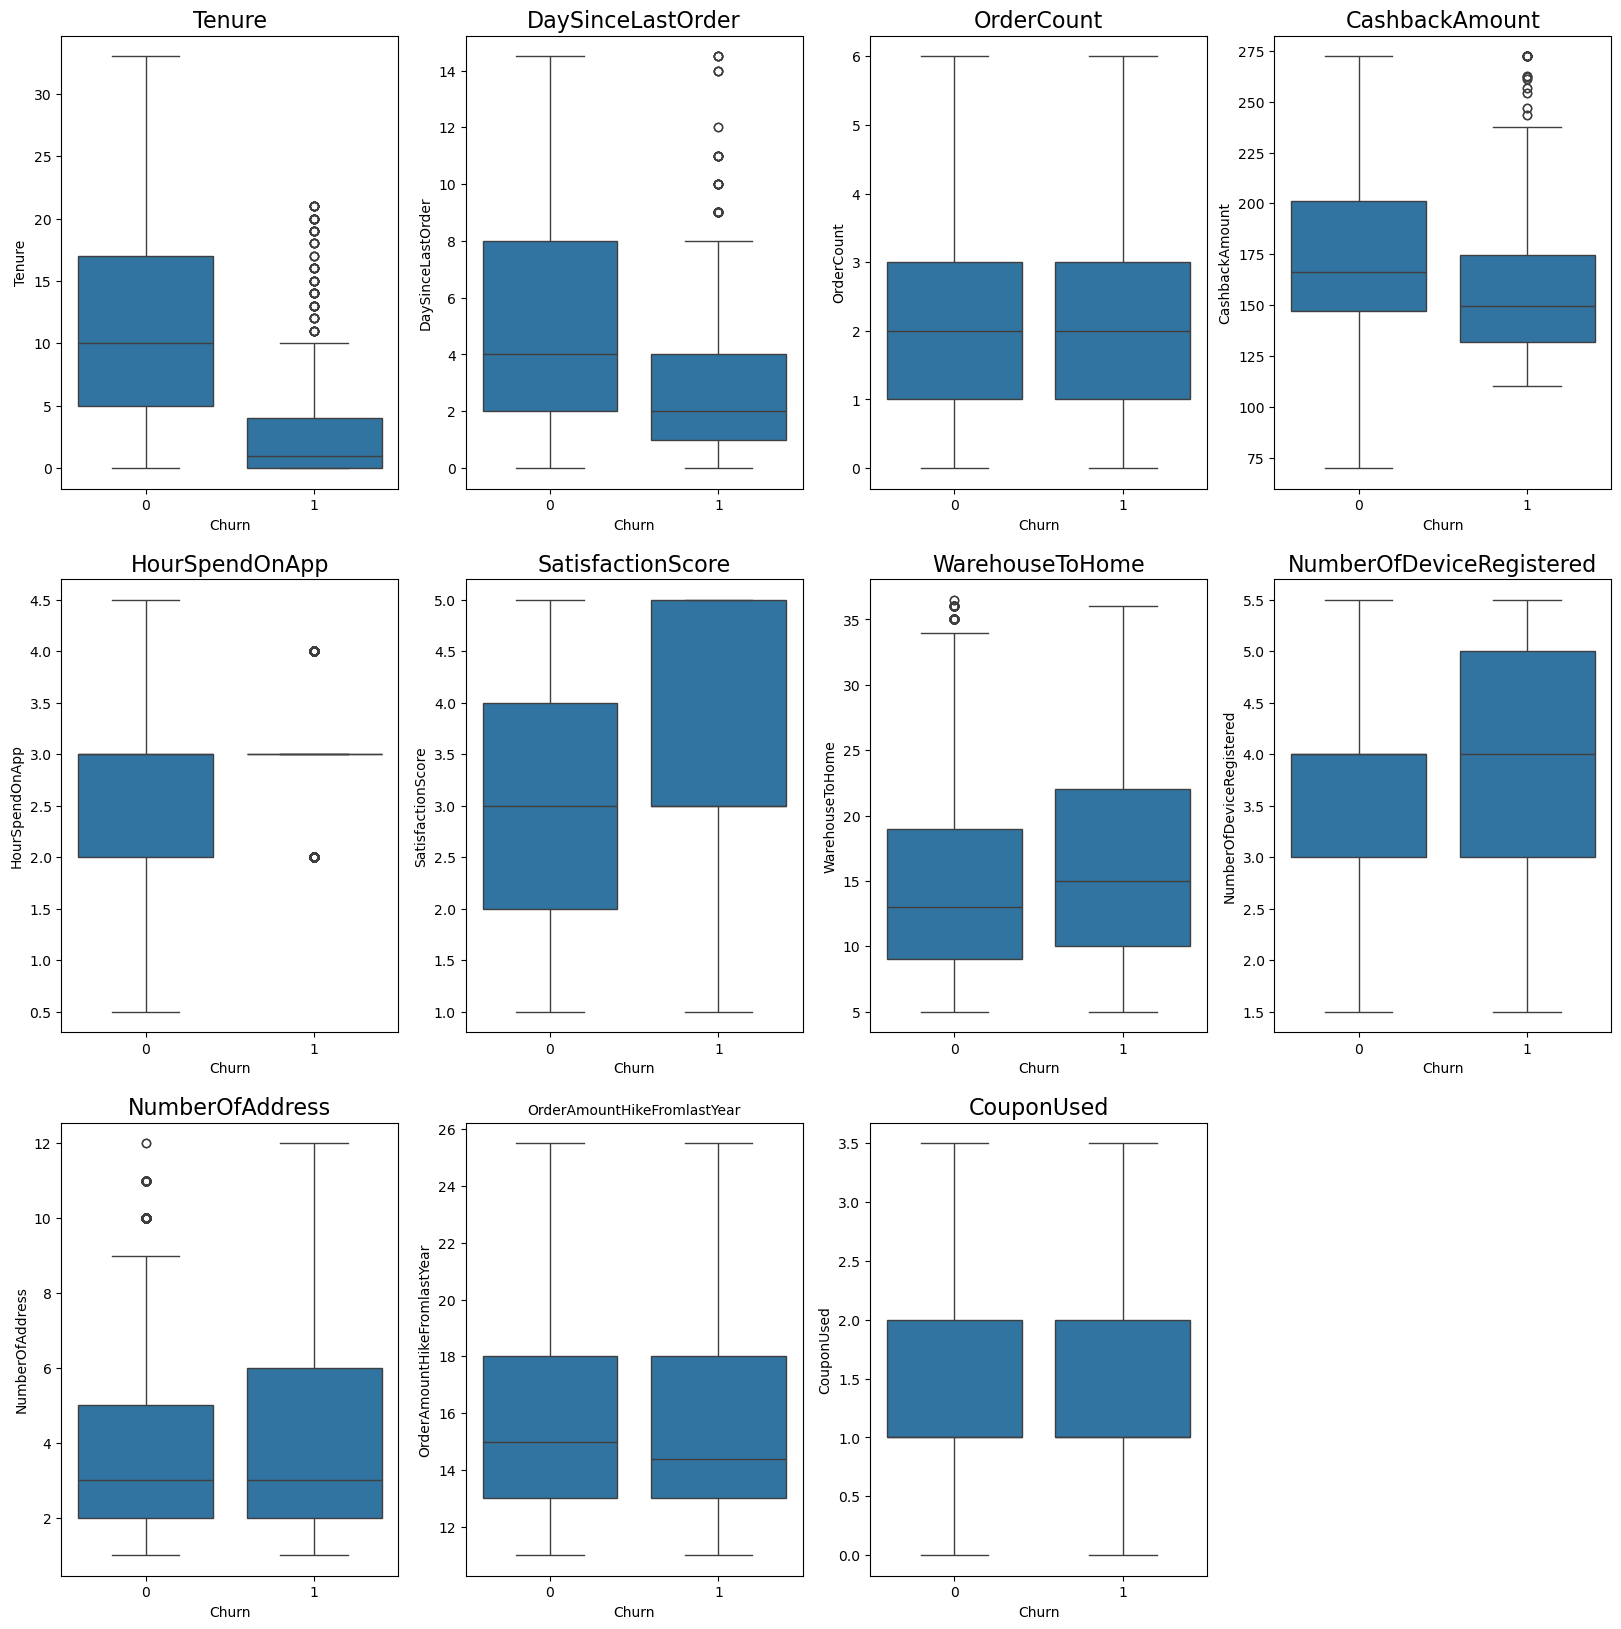

In [41]:
plt.figure(figsize=(20,20))

plt.subplot(341)
sns.boxplot(data=df,y='Tenure', x='Churn')
plt.title('Tenure',fontsize=16)

plt.subplot(342)
sns.boxplot(data=df,y='DaySinceLastOrder', x='Churn')
plt.title('DaySinceLastOrder',fontsize=16)

plt.subplot(343)
sns.boxplot(data=df,y='OrderCount', x='Churn')
plt.title('OrderCount',fontsize=16)

plt.subplot(344)
sns.boxplot(data=df,y='CashbackAmount', x='Churn')
plt.title('CashbackAmount',fontsize=16)

plt.subplot(345)
sns.boxplot(data=df,y='HourSpendOnApp', x='Churn')
plt.title('HourSpendOnApp' ,fontsize=16)

plt.subplot(346)
sns.boxplot(data=df,y='SatisfactionScore', x='Churn')
plt.title('SatisfactionScore',fontsize=16)

plt.subplot(347)
sns.boxplot(data=df,y='WarehouseToHome', x='Churn')
plt.title('WarehouseToHome',fontsize=16)

plt.subplot(348)
sns.boxplot(data=df,y='NumberOfDeviceRegistered', x='Churn')
plt.title('NumberOfDeviceRegistered',fontsize=16)

plt.subplot(349)
sns.boxplot(data=df,y='NumberOfAddress', x='Churn')
plt.title('NumberOfAddress',fontsize=16)

plt.subplot(3, 4, 10)
sns.boxplot(data=df,y='OrderAmountHikeFromlastYear', x='Churn')
plt.title('OrderAmountHikeFromlastYear',fontsize=10)

plt.subplot(3, 4, 11)
sns.boxplot(data=df,y='CouponUsed', x='Churn')
plt.title('CouponUsed',fontsize=16)

plt.show()

Berdasarkan grafik tersebut, dapat diambil beberapa kesimpulan: 
- Pelanggan dengan masa penggunaan (tenure) lebih pendek lebih cenderung churn dibandingkan yang memiliki tenure lebih lama.
- Pelanggan yang baru-baru ini melakukan pemesanan, berdasarkan DaySinceLastOrder, cenderung lebih sedikit churn dibandingkan yang sudah lama tidak melakukan pemesanan.
- Pelanggan dengan jumlah pesanan (OrderCount) lebih rendah lebih cenderung churn dibandingkan dengan pelanggan yang melakukan pesanan lebih sering.
- Pelanggan yang menerima cashback (CashbackAmount) lebih rendah memiliki kemungkinan churn yang lebih tinggi.
- Pelanggan dengan waktu penggunaan aplikasi (HourSpendOnApp) selama 3 jam memiliki tingkat churn yang tinggi. 
- Pelanggan dengan skor kepuasan (SatisfactoryScore) menengah hingga tinggi (3, 4, dan 5) sepertinya memiliki kecenderungan churn yang lebih tinggi, yang mungkin menunjukkan adanya faktor lain di luar kepuasan yang mempengaruhi keputusan mereka untuk berhenti menggunakan layanan.
- Pelanggan yang rumahnya lebih dekat ke gudang (WerehouseToHome) yang lebih kecil memiliki sedikit kemungkinan churn dibandingkan yang tinggal lebih jauh. 
- Pelanggan dengan lebih banyak perangkat terdaftar (NumberOfDeviceRegistered) pada akun mereka cenderung memiliki tingkat churn yang lebih tinggi.  
- Pelanggan yang memiliki lebih sedikit alamat yang terdaftar (NumberOfAddress) cenderung memiliki tingkat churn lebih tinggi dibandingkan dengan yang memiliki lebih banyak alamat. 
- Pelanggan dengan peningkatan pesanan (OrderAmountHikeFromlastYear) yang lebih rendah cenderung memiliki tingkat churn yang lebih tinggi. 
- Pelanggan yang lebih sedikit menggunakan kupon (CouponUsed) memiliki kecenderungan untuk churn dibandingkan pelanggan yang lebih banyak menggunakan kupon. 

### **Modeling**